# Paradoxo do Aniversário
___
Em teoria das probabilidades, o paradoxo do aniversário afirma que dado um grupo de 23 pessoas escolhidas aleatoriamente, a chance de que duas pessoas terão a mesma data de aniversário é de mais de 50%. Para 57 ou mais pessoas, a probabilidade é maior do que 99%, entretanto, ela não pode ser exatamente 100% exceto que se tenha pelo menos 367 pessoas [[1]](https://pt.wikipedia.org/wiki/Paradoxo_do_anivers%C3%A1rio#:~:text=Em%20teoria%20das%20probabilidades%2C%20o,%C3%A9%20de%20mais%20de%2050%25.&text=Calcular%20essa%20probabilidade%20(e%20as,%C3%A9%20o%20problema%20do%20anivers%C3%A1rio.).


Assim, visando responder a pergunta a seguir:

*Em um grupo de **n** pessoas, qual a probabilidade de ao menos duas fazerem aniversário no mesmo dia?*

Nesse contexto, considerando um ano com 365 dias i.e. desconsiderando anos bissextos, temos que o espaço amostral $\Omega$ contendo todas as combinações possíveis para *n* pessoas seria:

$$\Omega = \{(1,1,...,1),(1,1,...,2),...,(1,2,...,1),...,(365,365,...,365)\}$$

Nesse caso, o arranjo seria $\Omega = 365^n = 365^{30} = 73.10^{75}$

Nesse caso, ao invés de calcular a probabilidade de um evento $A$ = ao menos 2 pessoas fazem aniversário no mesmo dia entre *n* pessoas, é mais fácil calcular a probabilidade complementar, i.e. $A^c$ = nenhuma pessoa faz aniversário no mesmo dia entre *n* pessoas. Portanto, temos que a probabilidade complementar seria:

$$ P(A^c) = \frac{A^c}{\Omega} = \frac{365x364x...x(365-n+1)}{365^n} = \frac{365!}{365^n(365-n)!} $$

Assim, a probabilidade do evento $A$:

$$P(A) = 1 - \frac{365!}{365^n(365-n)!} $$

Podemos, portanto, calcular a probabilidade de *n* pessoas utilizando tanto o fatorial apresentado acima, como uma expansão da série de Taylor para a função exponencial de acordo com [[1]](https://pt.wikipedia.org/wiki/Paradoxo_do_anivers%C3%A1rio#:~:text=Em%20teoria%20das%20probabilidades%2C%20o,%C3%A9%20de%20mais%20de%2050%25.&text=Calcular%20essa%20probabilidade%20(e%20as,%C3%A9%20o%20problema%20do%20anivers%C3%A1rio.).


In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [7]:
# função fatorial retirada da Wikipedia
def birthday_factorial(n):
    p = (1.0/365)**n
    for i in range((366-n),366):
        p *= i
    return 1-p

In [19]:
# calcular para 23 pessoas - probabilidade superior a 50%
print(birthday_factorial(23))

0.5072972343239852


In [4]:
# expansão aproximada pela exponencial
def birthday_exponential(n):
    return 1-np.exp((-n**2)/(2*365))

In [21]:
# calcular para 23 pessoas - probabilidade superior a 50%
print(birthday_exponential(23))

0.5155095380615168


In [8]:
# calcular valores teóricos
factorial = []
exponential = []
for i in range(1,100):
    factorial.append(birthday_factorial(i))
    exponential.append(birthday_exponential(i))

In [6]:
# simulação
nsim = 1000
count = 0
simulations = []
for n in range(1,100):
    for sim in range(nsim):
        birthdays = np.random.randint(1,365,n)
        unique_birthdays = set(birthdays)
        if len(birthdays) != len(unique_birthdays):
            count += 1
    count = count/nsim 
    simulations.append(count)

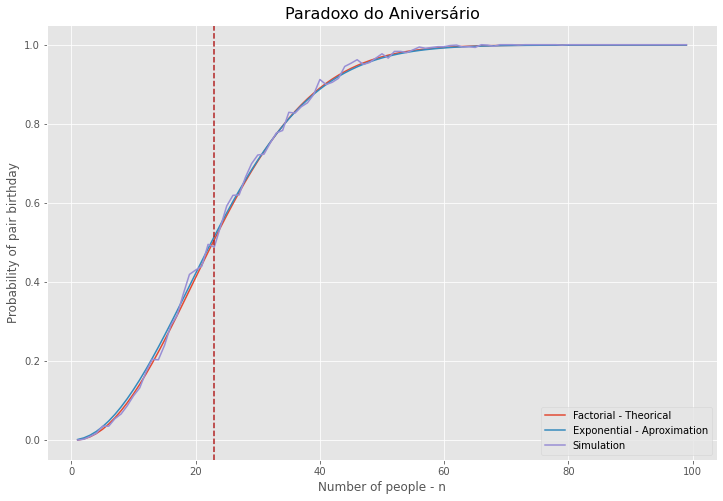

In [18]:
# visualizar
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,100),factorial,label='Factorial - Theorical')
plt.plot(np.arange(1,100),exponential,label='Exponential - Aproximation')
plt.plot(np.arange(1,100),simulations,label='Simulation')
plt.axvline(x=23,ymin=0.,ymax=1.,linestyle='--',color='firebrick')
plt.legend()
plt.xlabel('Number of people - n')
plt.ylabel('Probability of pair birthday')
plt.title('Paradoxo do Aniversário', size=16)
plt.show()